## Homework 9 Assignment 3

# Table of Contents
 <p><div class="lev1 toc-item"><a href="#DATA:" data-toc-modified-id="DATA:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATA:</a></div><div class="lev1 toc-item"><a href="#exploration" data-toc-modified-id="exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>exploration</a></div><div class="lev2 toc-item"><a href="#plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)" data-toc-modified-id="plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-civilian-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-civilian-fire-arms-per-person-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>plot the average number of civilian fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-homicide-by-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-homicide-by-fire-arms-per-person-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>plot the average number of homicide by fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev1 toc-item"><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></div><div class="lev2 toc-item"><a href="#fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person." data-toc-modified-id="fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person.-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person.</a></div><div class="lev2 toc-item"><a href="#Outlier-removal:" data-toc-modified-id="Outlier-removal:-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Outlier removal:</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them" data-toc-modified-id="Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Extra credit: calculate the confidence interval by hand and also plot them</a></div><div class="lev2 toc-item"><a href="#Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot." data-toc-modified-id="Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot.-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Use the stsatsmodels.gaphics package to plot the influence plot.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences" data-toc-modified-id="Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences</a></div><div class="lev2 toc-item"><a href="#Discuss-your-findings" data-toc-modified-id="Discuss-your-findings-36"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Discuss your findings</a></div>

**regression exercise**

**written by Federica B Bianco CUSP 2017**

**for PUI lecture on models and linear regression**

**investigate linear relationships between fire arm possession, homicides by fire arms, and mass shootings for different countries, considering also the country GDP**

In [1]:
#worked in small amounts with Sam Burns 

In [2]:
from __future__ import print_function, division
import pylab as pl

import os
import json

import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

try:
    import urllib2 as urllib
except ImportError:
    import urllib.request as urllib
import csv
    
import seaborn as sns
%pylab inline



Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


# DATA: 

The Guardian firearms murders and ownership data. The relevans sheet is uploaded in the github repository as a csv file. Download it from there. Note: this dataset is from 2012.

**Extra credit**: download directly from google docs with a google API

https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0

Number of mass shootings: find the link here https://datawrapper.dwcdn.net/pvLFI/4/

The world population by country find the download link here :
https://data.worldbank.org/indicator/SP.POP.TOTL

Remember that all read or downloads have to me reproducible.

Merge all datasets. After throwing away the irrelevant data it should look something like this (I renamed the GDP and the population as gdp" and "pop")

Throughout, when I ask you to include errors in plots or models, use Poisson statistics: the error is the square root of the number you are considering (e.g. this country has N fire arms +/- square root of N, or this country has Np [= N/population +/- (square root of N) / population] fire arms per person).

In [3]:
ms = pd.read_csv('https://serv.cusp.nyu.edu/~fbianco/PUIdata/WorldFirearmsMurdersAndOwnership.csv')

In [4]:
ms.head()

,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
0,Albania,AL,CTS,65.9,56.0,1.76,70.0,8.6,270000.0
1,Algeria,DZ,CTS,4.8,20.0,0.06,78.0,7.6,1900000.0
2,Angola,AO,NaN,NaN,NaN,NaN,34.0,17.3,2800000.0
3,Anguilla,AI,WHO-MDB,24.0,1.0,7.14,NaN,NaN,NaN
4,Argentina,AR,Ministry of Justice,52.0,1198.0,3.02,62.0,10.2,3950000.0


In [5]:
ms.rename(columns={'Country/Territory':'Country'}, inplace=True)

In [6]:
!curl 'http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv' > 'worldpop.zip'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 79715  100 79715    0     0   283k      0 --:--:-- --:--:-- --:--:--  284k


In [7]:
!curl 'http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=csv' > 'gdp.zip'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  113k  100  113k    0     0   528k      0 --:--:-- --:--:-- --:--:--  529k


In [8]:
# set PUI varibale

In [9]:

print("PUIdata", os.getenv("PUIDATA"))
os.environ["PUIDATA"] = "%s/PUI2018/PUIdata"%os.getenv("HOME")

print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/sjf374/PUIdata
PUIdata /nfshome/sjf374/PUI2018/PUIdata


In [10]:
## move the data
os.system("mv worldpop.zip " + os.getenv("PUIDATA"))

0

In [11]:
### unzip the csv 
os.system("unzip " + os.getenv("PUIDATA") + "/worldpop.zip -d " + os.getenv("PUIDATA"))

0

In [12]:
df = pd.read_csv("%s/API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv"%os.getenv("PUIDATA"), skiprows=3)

In [13]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0,NaN


In [14]:
df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', 'Unnamed: 62'],
      dtype='object')

In [15]:
popdf = df[['Country Name', '2012']]

In [16]:
popdf.columns = ['Country Name', 'pop']

In [17]:
popdf.head()

,Country Name,pop
0,Aruba,102577.0
1,Afghanistan,30696958.0
2,Angola,25096150.0
3,Albania,2900401.0
4,Andorra,82431.0


In [18]:
#now for the gdp

In [19]:
## move the data
os.system("mv gdp.zip " + os.getenv("PUIDATA"))
### unzip the csv 
os.system("unzip " + os.getenv("PUIDATA") + "/gdp.zip -d " + os.getenv("PUIDATA"))

0

In [20]:
gdpdf = pd.read_csv("%s/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv"%os.getenv("PUIDATA"), skiprows=3)

In [21]:
gdpdf.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09,NaN


In [22]:
gdpdf = gdpdf[['Country Name', '2012']]

In [23]:
gdpdf.columns = ['Country Name', 'gdp']

In [24]:
gdpdf.head()

,Country Name,gdp
0,Aruba,NaN
1,Afghanistan,2.053654e+10
2,Angola,1.139232e+11
3,Albania,1.231978e+10
4,Andorra,3.164615e+09


In [25]:
worlddf = pd.merge(popdf, gdpdf, on='Country Name')

In [26]:
worlddf.head()

,Country Name,pop,gdp
0,Aruba,102577.0,NaN
1,Afghanistan,30696958.0,2.053654e+10
2,Angola,25096150.0,1.139232e+11
3,Albania,2900401.0,1.231978e+10
4,Andorra,82431.0,3.164615e+09


In [27]:
ms.head()

,Country,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
0,Albania,AL,CTS,65.9,56.0,1.76,70.0,8.6,270000.0
1,Algeria,DZ,CTS,4.8,20.0,0.06,78.0,7.6,1900000.0
2,Angola,AO,NaN,NaN,NaN,NaN,34.0,17.3,2800000.0
3,Anguilla,AI,WHO-MDB,24.0,1.0,7.14,NaN,NaN,NaN
4,Argentina,AR,Ministry of Justice,52.0,1198.0,3.02,62.0,10.2,3950000.0


In [28]:
wdf = worlddf.merge(ms, left_on="Country Name", right_on="Country")
wdf.head()

,Country Name,pop,gdp,Country,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
0,Angola,25096150.0,1.139232e+11,Angola,AO,NaN,NaN,NaN,NaN,34.0,17.3,2800000.0
1,Albania,2900401.0,1.231978e+10,Albania,AL,CTS,65.9,56.0,1.76,70.0,8.6,270000.0
2,United Arab Emirates,8900453.0,3.745906e+11,United Arab Emirates,AE,NaN,NaN,NaN,NaN,24.0,22.1,1000000.0
3,Argentina,42096739.0,5.459824e+11,Argentina,AR,Ministry of Justice,52.0,1198.0,3.02,62.0,10.2,3950000.0
4,Armenia,2881922.0,1.061932e+10,Armenia,AM,CTS,13.0,9.0,0.29,52.0,12.5,380000.0


In [29]:
wdf.columns

Index(['Country Name', 'pop', 'gdp', 'Country', 'ISO code', 'Source',
       '% of homicides by firearm', 'Number of homicides by firearm',
       'Homicide by firearm rate per 100,000 pop', 'Rank by rate of ownership',
       'Average firearms per 100 people',
       'Average total all civilian firearms'],
      dtype='object')

In [30]:
wdf = wdf[['Country Name', 'pop', 'gdp', 'Country',
        'Number of homicides by firearm',
       'Homicide by firearm rate per 100,000 pop',
       'Average firearms per 100 people',
       'Average total all civilian firearms']]

In [31]:
wdf.head()

,Country Name,pop,gdp,Country,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Average firearms per 100 people,Average total all civilian firearms
0,Angola,25096150.0,1.139232e+11,Angola,NaN,NaN,17.3,2800000.0
1,Albania,2900401.0,1.231978e+10,Albania,56.0,1.76,8.6,270000.0
2,United Arab Emirates,8900453.0,3.745906e+11,United Arab Emirates,NaN,NaN,22.1,1000000.0
3,Argentina,42096739.0,5.459824e+11,Argentina,1198.0,3.02,10.2,3950000.0
4,Armenia,2881922.0,1.061932e+10,Armenia,9.0,0.29,12.5,380000.0


In [32]:
wdf.shape

(155, 8)

In [33]:
url = 'data:application/octet-stream;charset=utf-8,Country%2CGuns%20per%20100%20inhabitants%2CNumber%20of%20mass%20shootings%20(1983-2013)%0AAustralia%2C15%2C4%0AAustria%2C30.4%2C1%0ABelgium%2C17.2%2C2%0ACanada%2C30.8%2C4%0ADenmark%2C12%2C0%0AFinland%2C45.3%2C2%0AFrance%2C31.2%2C6%0AGermany%2C30.3%2C7%0AGreece%2C22.5%2C0%0AHolland%2C3.9%2C2%0AHungary%2C5.5%2C0%0AIceland%2C30.3%2C0%0AIreland%2C8.6%2C0%0AItaly%2C11.9%2C0%0AJapan%2C0.6%2C0%0ALuxembourg%2C15.3%2C0%0ANew%20Zealand%2C22.6%2C3%0ANorway%2C31.3%2C1%0APoland%2C1.3%2C0%0APortugal%2C8.5%2C1%0ASpain%2C10.4%2C1%0ASweden%2C31.6%2C2%0ASwitzerland%2C45.7%2C2%0AUnited%20Kingdom%2C6.2%2C3%0AUnited%20States%2C88.8%2C78'

In [34]:
response = urllib.urlopen(url)
cr = csv.reader(response)
msdf = pd.read_csv(response)

In [35]:
response

<addinfourl at 140056714754256 whose fp = <_io.BytesIO object at 0x7f617df8cfc0>>

In [36]:
wdf = wdf.merge(msdf, right_on="Country", left_on="Country Name")

In [37]:
wdf.head()

,Country Name,pop,gdp,Country_x,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Average firearms per 100 people,Average total all civilian firearms,Country_y,Guns per 100 inhabitants,Number of mass shootings (1983-2013)
0,Australia,22742475.0,1.543411e+12,Australia,30.0,0.14,15.0,3050000.0,Australia,15.0,4
1,Austria,8429991.0,4.094252e+11,Austria,18.0,0.22,30.4,2500000.0,Austria,30.4,1
2,Belgium,11128246.0,4.978842e+11,Belgium,70.0,0.68,17.2,1800000.0,Belgium,17.2,2
3,Canada,34750545.0,1.824289e+12,Canada,173.0,0.51,30.8,9950000.0,Canada,30.8,4
4,Switzerland,7996861.0,6.680436e+11,Switzerland,57.0,0.77,45.7,3400000.0,Switzerland,45.7,2


In [38]:
wdf = wdf[['Country Name', 'pop', 'gdp', 'Country_x',
        'Number of homicides by firearm',
       'Homicide by firearm rate per 100,000 pop',
       'Average firearms per 100 people',
       'Average total all civilian firearms', 'Number of mass shootings (1983-2013)']]

In [39]:
wdf.columns = ['Country Name', 'pop', 'gdp', 'Country',
        'Number of homicides by firearm',
       'Homicide by firearm rate per 100,000 pop',
       'Guns/100 inhabitants',
       'Average total all civilian firearms', 'Number of mass shootings']

In [40]:
wdf.head()

,Country Name,pop,gdp,Country,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Guns/100 inhabitants,Average total all civilian firearms,Number of mass shootings
0,Australia,22742475.0,1.543411e+12,Australia,30.0,0.14,15.0,3050000.0,4
1,Austria,8429991.0,4.094252e+11,Austria,18.0,0.22,30.4,2500000.0,1
2,Belgium,11128246.0,4.978842e+11,Belgium,70.0,0.68,17.2,1800000.0,2
3,Canada,34750545.0,1.824289e+12,Canada,173.0,0.51,30.8,9950000.0,4
4,Switzerland,7996861.0,6.680436e+11,Switzerland,57.0,0.77,45.7,3400000.0,2


# exploration

## plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)

Are there any points that look like they may be outilers?


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


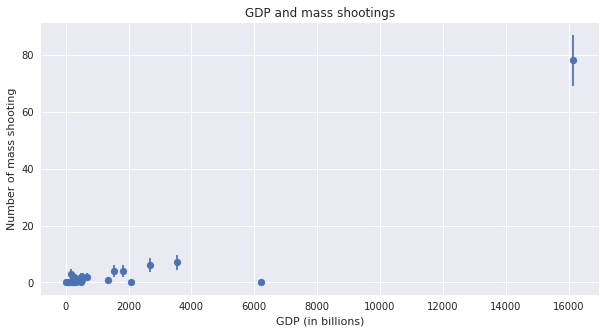

Figure 1: Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has the highest GDP and the highest number of mass shootings


In [41]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(wdf.gdp / 1e9, wdf['Number of mass shootings'])
ax.errorbar(wdf.gdp / 1e9, wdf['Number of mass shootings'], 
            yerr = np.sqrt(wdf['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shooting")
plt.title('GDP and mass shootings')
ax.set_ylim()
pl.show()
print ("Figure 1: Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has the highest GDP and the highest number of mass shootings")


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


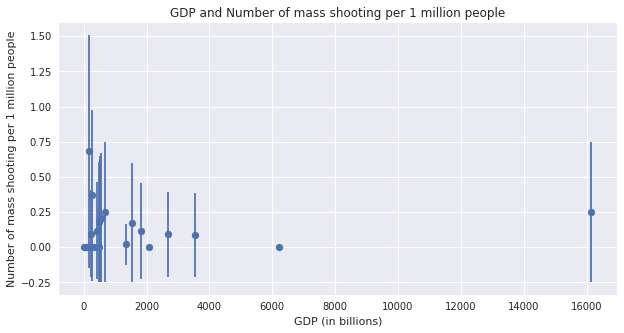

In [42]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

MSperPerson = wdf['Number of mass shootings']/ wdf['pop']

scatter = ax.scatter(wdf.gdp / 1e9, MSperPerson*1e6)
ax.errorbar(wdf.gdp / 1e9, MSperPerson*1e6, 
            yerr = np.sqrt(MSperPerson * 1e6), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shooting per 1 million people")
plt.title('GDP and Number of mass shooting per 1 million people')
ax.set_ylim()
pl.show()



#### figure 2: adjusting by per person seems to introduce more error, now new zealand seems to be have the most mass shootings per 1 million people

In [43]:
wdf['MSperPerson'] = (wdf['Number of mass shootings']/ wdf['pop'])*1e6

In [44]:
wdf.sort(columns='MSperPerson')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Country Name,pop,gdp,Country,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Guns/100 inhabitants,Average total all civilian firearms,Number of mass shootings,MSperPerson
11,Hungary,9920362.0,1.278566e+11,Hungary,7.0,0.07,5.5,560000.0,0,0.000000
19,Poland,38063164.0,5.003608e+11,Poland,35.0,0.09,1.3,510000.0,0,0.000000
6,Denmark,5591572.0,3.271489e+11,Denmark,15.0,0.27,12.0,650000.0,0,0.000000
16,Luxembourg,530946.0,5.667796e+10,Luxembourg,3.0,0.62,15.3,70000.0,0,0.000000
10,Greece,11045011.0,2.456707e+11,Greece,29.0,0.26,22.5,2500000.0,0,0.000000
15,Japan,127629000.0,6.203213e+12,Japan,11.0,0.01,0.6,710000.0,0,0.000000
12,Ireland,4599533.0,2.255719e+11,Ireland,21.0,0.48,8.6,360000.0,0,0.000000
13,Iceland,320716.0,1.429201e+10,Iceland,0.0,0.00,30.3,90000.0,0,0.000000
14,Italy,59539717.0,2.072823e+12,Italy,417.0,0.71,11.9,7000000.0,0,0.000000
7,Spain,46773055.0,1.336019e+12,Spain,90.0,0.20,10.4,4500000.0,1,0.021380


In [45]:
##not sure if the above should be gdp per person or mass shootings per person? 

## plot the average number of civilian fire arms per person
first without errors, then with errors. are there  points that look like outliers?

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


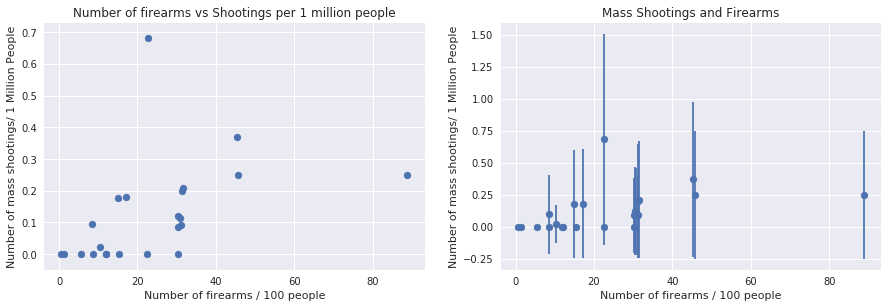

In [46]:
fig = pl.figure(figsize=(15,10)) 
ax = fig.add_subplot(221)

scatter = ax.scatter(wdf['Guns/100 inhabitants'], wdf['MSperPerson'])
ax.set_xlabel("Number of firearms / 100 people")
ax.set_ylabel("Number of mass shootings/ 1 Million People")
ax.set_ylim()
ax.set_title("Number of firearms vs Shootings per 1 million people")



ax = fig.add_subplot(222)

scatter = ax.scatter(wdf['Guns/100 inhabitants'], wdf['MSperPerson'])
#error bars don't seem to work in this context
ax.errorbar(wdf['Guns/100 inhabitants'], wdf['MSperPerson'], 
            yerr = np.sqrt(wdf['MSperPerson']), fmt = '.')
ax.set_xlabel("Number of firearms / 100 people")
ax.set_ylabel("Number of mass shootings/ 1 Million People")
ax.set_ylim()
plt.title('Mass Shootings and Firearms')


pl.show()




#### Figure 3: again we see new zealand become more of an outlier. We also see that there is some what of a positive linear relationship between the two variables

## plot the average number of homicide by fire arms per person
first as a histogram

then against the country GDP, with statistical errors. are there  points that look like outliers?

Text(0.5,1,'Histogram of Countries and their Homicides by Firearm per 1000 Paeople')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


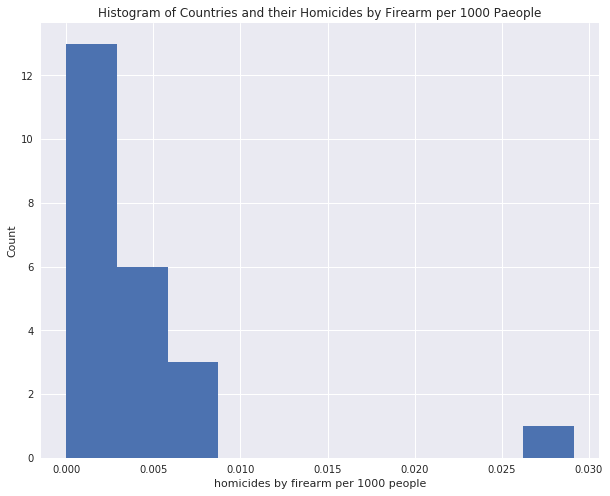

In [47]:
fig, ax = plt.subplots(figsize=(10,8))
ax.hist(wdf['Number of homicides by firearm'] / wdf['pop'] * 1000)
ax.set_xlabel('homicides by firearm per 1000 people')
ax.set_ylabel('Count')
plt.title('Histogram of Countries and their Homicides by Firearm per 1000 Paeople')

#### Figure 4: the graph is skewed right as there are a higher porportion of countries that have a metric (homicides by firearm per 1000 people) below the median

In [115]:
wdf['FIREperPerson'] = wdf['Number of homicides by firearm'] / wdf['pop'] * 1000


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


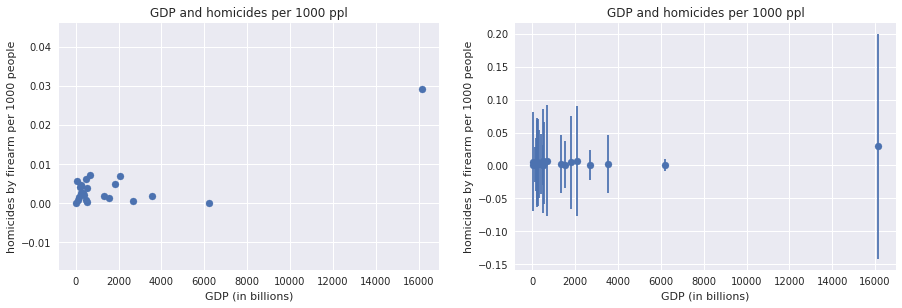

In [116]:
fig = pl.figure(figsize=(15,10)) 
ax = fig.add_subplot(221)

scatter = ax.scatter(wdf['gdp'] / 1e9, wdf['FIREperPerson'])
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("homicides by firearm per 1000 people")
plt.title('GDP and homicides per 1000 ppl')

ax = fig.add_subplot(222)

scatter = ax.scatter(wdf['gdp'] / 1e9, wdf['FIREperPerson'])
ax.errorbar(wdf.gdp / 1e9, wdf['FIREperPerson'], 
            yerr = np.sqrt(wdf['FIREperPerson'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("homicides by firearm per 1000 people")
plt.title('GDP and homicides per 1000 ppl')

pl.show()

### Figure 5: as before, USA is an outlier here in GDP. and also seem to be the outlier in firearms. Besides that point there doesnt seem to be a lot of correlation between the two variables

## plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color
with and without errorbars


In [117]:
wdf.head()

,Country Name,pop,gdp,Country,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Guns/100 inhabitants,Average total all civilian firearms,Number of mass shootings,MSperPerson,FIREperPerson
0,Australia,22742475.0,1.543411e+12,Australia,30.0,0.14,15.0,3050000.0,4,0.175882,0.001319
1,Austria,8429991.0,4.094252e+11,Austria,18.0,0.22,30.4,2500000.0,1,0.118624,0.002135
2,Belgium,11128246.0,4.978842e+11,Belgium,70.0,0.68,17.2,1800000.0,2,0.179723,0.006290
3,Canada,34750545.0,1.824289e+12,Canada,173.0,0.51,30.8,9950000.0,4,0.115106,0.004978
4,Switzerland,7996861.0,6.680436e+11,Switzerland,57.0,0.77,45.7,3400000.0,2,0.250098,0.007128


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


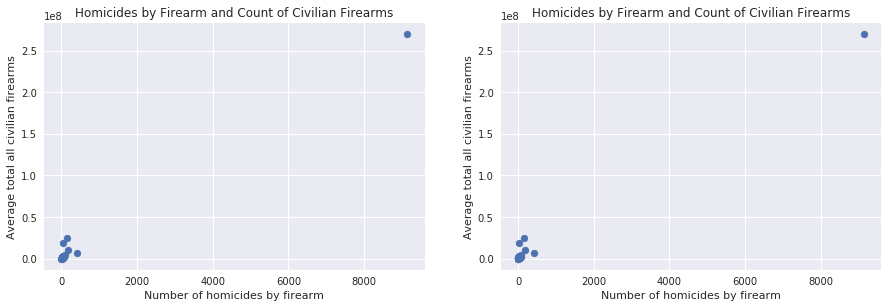

In [118]:
fig = pl.figure(figsize=(15,10)) 
ax = fig.add_subplot(221)

scatter = ax.scatter(wdf['Number of homicides by firearm'] , wdf['Average total all civilian firearms'])
ax.set_xlabel("Number of homicides by firearm")
ax.set_ylabel("Average total all civilian firearms")
plt.title("Homicides by Firearm and Count of Civilian Firearms")

ax = fig.add_subplot(222)

scatter = ax.scatter(wdf['Number of homicides by firearm'] , wdf['Average total all civilian firearms'])
ax.errorbar(wdf['Number of homicides by firearm'] , wdf['Average total all civilian firearms'], 
            yerr = np.sqrt(wdf['Average total all civilian firearms'] * 1.0), fmt = '.')
ax.set_xlabel("Number of homicides by firearm")
ax.set_ylabel("Average total all civilian firearms")
plt.title('Homicides by Firearm and Count of Civilian Firearms')

pl.show()

In [119]:
### Figure 6: unsurprisingly the United states is an outlier in both of these variables

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


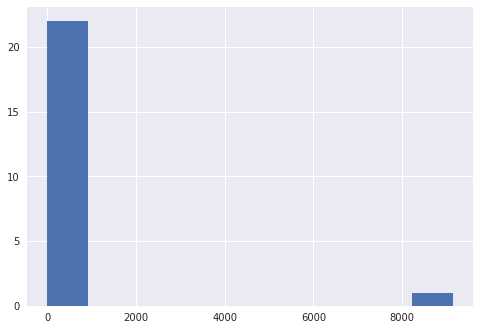

In [120]:
wdf['Number of homicides by firearm'].hist()

In [121]:
## histogram to confirm the distribution

## plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color
with and without errorbars


In [122]:
[x=='United States' for x in wdf['Country']]

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True]

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


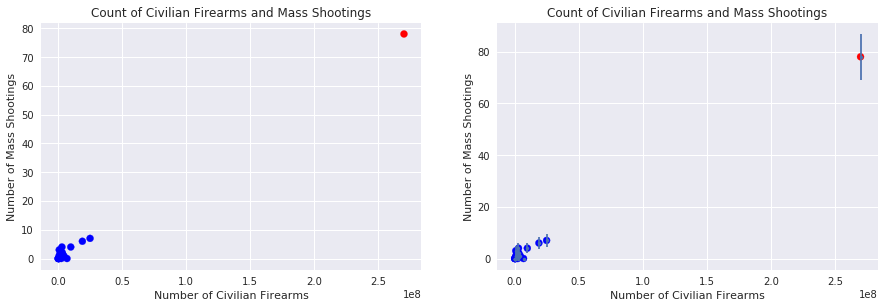

In [123]:
fig = pl.figure(figsize=(15,10)) 
ax = fig.add_subplot(221)

usonly=[x=='United States' for x in wdf['Country']]

scatter = ax.scatter(wdf['Average total all civilian firearms'] , wdf['Number of mass shootings'], c=usonly, cmap='bwr')
ax.set_xlabel("Number of Civilian Firearms")
ax.set_ylabel("Number of Mass Shootings")
plt.title("Count of Civilian Firearms and Mass Shootings")

ax = fig.add_subplot(222)

scatter = ax.scatter(wdf['Average total all civilian firearms'] , wdf['Number of mass shootings'], c=usonly, cmap='bwr')
ax.errorbar(wdf['Average total all civilian firearms'] , wdf['Number of mass shootings'], 
            yerr = np.sqrt(wdf['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("Number of Civilian Firearms")
ax.set_ylabel("Number of Mass Shootings")
plt.title("Count of Civilian Firearms and Mass Shootings")

pl.show()

In [124]:
## Figure 7: we see a slight linear relationship here, and as seen before, US looks like an outlier

# Modeling

## fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 
Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use

    - statsmodels OLS
    - statsmodels WLS
    - seaborn
    - choose one of
        -- creating a function that calculates the residuals and minimizing that function
        -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
        -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
    

WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors:
weights = 1.0/df.yerror
Notice that 
    a - sqrt(0) = 0
    b - 1/0 = infinity
    c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.


the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb
Since we did not discuss these, I will add some notes to the repo in the afternoon.

Use the seaborn python package built in regression function  to plot the regression confidence intervals. 

import seaborn  as sns
sns.regplot(x="x", y="y", data=df);




In [125]:
wdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 22
Data columns (total 11 columns):
Country Name                                23 non-null object
pop                                         23 non-null float64
gdp                                         23 non-null float64
Country                                     23 non-null object
Number of homicides by firearm              23 non-null float64
Homicide by firearm rate per 100,000 pop    23 non-null float64
Guns/100 inhabitants                        23 non-null float64
Average total all civilian firearms         23 non-null float64
Number of mass shootings                    23 non-null int64
MSperPerson                                 23 non-null float64
FIREperPerson                               23 non-null float64
dtypes: float64(8), int64(1), object(2)
memory usage: 2.2+ KB


In [126]:
wdf.describe()

,pop,gdp,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Guns/100 inhabitants,Average total all civilian firearms,Number of mass shootings,MSperPerson,FIREperPerson
count,2.300000e+01,2.300000e+01,23.000000,23.000000,23.000000,2.300000e+01,23.000000,23.000000,23.000000
mean,3.843543e+07,1.745179e+12,453.434783,0.423043,23.786957,1.565543e+07,4.956522,0.123569,0.004093
std,6.788910e+07,3.457710e+12,1897.064355,0.603290,19.089581,5.578880e+07,16.046745,0.161320,0.005896
min,3.207160e+05,1.429201e+10,0.000000,0.000000,0.600000,7.000000e+04,0.000000,0.000000,0.000000
25%,5.502772e+06,2.356213e+11,13.000000,0.115000,11.150000,6.800000e+05,0.000000,0.000000,0.001119
50%,1.051484e+07,5.003608e+11,30.000000,0.260000,22.500000,2.400000e+06,1.000000,0.091380,0.002626
75%,4.241811e+07,1.683850e+12,63.500000,0.495000,31.000000,3.950000e+06,2.500000,0.189491,0.004772
max,3.139933e+08,1.615526e+13,9146.000000,2.970000,88.800000,2.700000e+08,78.000000,0.680565,0.029128


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


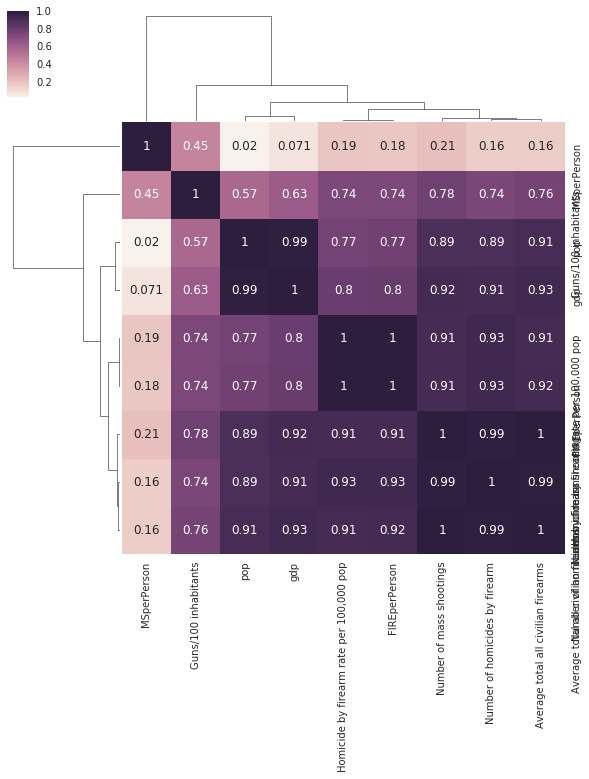

In [127]:
sns.set(font_scale=1)
sns.clustermap(wdf.corr(), annot=True)

In [128]:
#we see from these correlations that many of the variables are highly coorelated 
#

In [129]:
#sns.pairplot(wdf) computationally expensive

In [130]:
##statsmodel OLS

In [131]:
# Number of mass shootings per person 
# Average total all civilian firearms per person.

In [132]:
X = sm.add_constant(wdf['FIREperPerson'])

In [133]:
Y = wdf['MSperPerson']

In [134]:
olsfit = sm.OLS(Y, X).fit()


In [135]:
def weights(y): 
    '''inverse of the error'''
    y = [1 if x==0 else x for x in y]
    return 1/np.sqrt(y)
wt = weights(Y)

In [136]:
#WLS

In [137]:
wlsfit = sm.WLS(Y,X,weights=wt).fit()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


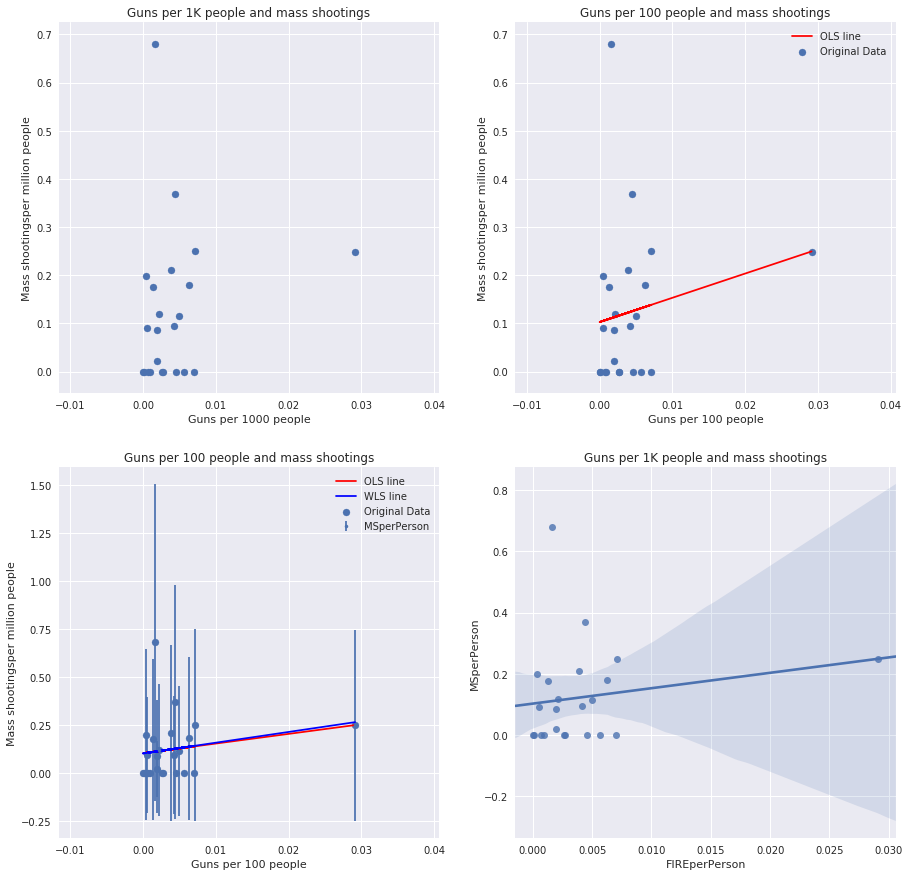

In [138]:
fig = pl.figure(figsize=(15,15))
ax1 = fig.add_subplot(221)
ax1.scatter(wdf['FIREperPerson'], Y, label = "Original Data")
ax1.set_xlabel("Guns per 1000 people")
ax1.set_ylabel("Mass shootingsper million people")
plt.title('Guns per 1K people and mass shootings')
ax2 = fig.add_subplot(222)
ax2.scatter(wdf['FIREperPerson'], Y, label = "Original Data")
ax2.set_xlabel("Guns per 100 people")
ax2.set_ylabel("Mass shootingsper million people")
ax2.plot(wdf['FIREperPerson'], olsfit.predict(X),  'r', label='OLS line')

ax2.legend()
plt.title('Guns per 100 people and mass shootings')
          
ax3 = fig.add_subplot(223)
ax3.scatter(wdf['FIREperPerson'], Y, label = "Original Data")
ax3.errorbar(wdf['FIREperPerson'], Y, 
            yerr = np.sqrt(Y * 1.0), fmt = '.')
ax3.set_xlabel("Guns per 100 people")
ax3.set_ylabel("Mass shootingsper million people")
ax3.plot(wdf['FIREperPerson'], olsfit.predict(X),  'r', label='OLS line')
ax3.plot(wdf['FIREperPerson'], wlsfit.predict(X),  'b', label='WLS line')

ax3.legend()
plt.title('Guns per 100 people and mass shootings')


ax4 = fig.add_subplot(224)
sns.regplot(x=wdf['FIREperPerson'], y=Y,ax=ax4)
ax3.set_xlabel("Guns per 100 people")
ax3.set_ylabel("Mass shootingsper million people")
plt.title('Guns per 1K people and mass shootings')
plt.show()
          


In [ ]:
## Figure: Diffent kinds of line fits for the same data. OLS, WLS and Seaborn. In terms of asthetic, seaborn seems to be the best. Wondering if it is only fitting to the outliers 

## Outlier removal:
The concept of outlier is actually rather sophisticated: a point can be an outlier in a context but not in another. If you want to remove outliers and try different fits, here is some info on how to remove data efficiently from a dataset 
    https://gist.github.com/fedhere/89db40a3c9a28335bf5a35d52a52c595

In [ ]:
#removing based on histograms

In [141]:
outlierwdf = wdf[wdf['FIREperPerson']<.025]

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


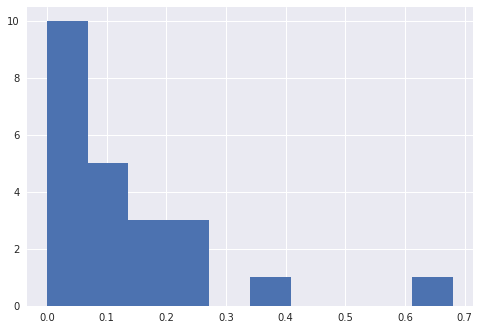

In [143]:
wdf['MSperPerson'].hist()

In [144]:
outlierwdf = outlierwdf[outlierwdf['MSperPerson']<.6]

In [145]:
outlierwdf

,Country Name,pop,gdp,Country,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Guns/100 inhabitants,Average total all civilian firearms,Number of mass shootings,MSperPerson,FIREperPerson
0,Australia,22742475.0,1.543411e+12,Australia,30.0,0.14,15.0,3050000.0,4,0.175882,0.001319
1,Austria,8429991.0,4.094252e+11,Austria,18.0,0.22,30.4,2500000.0,1,0.118624,0.002135
2,Belgium,11128246.0,4.978842e+11,Belgium,70.0,0.68,17.2,1800000.0,2,0.179723,0.006290
3,Canada,34750545.0,1.824289e+12,Canada,173.0,0.51,30.8,9950000.0,4,0.115106,0.004978
4,Switzerland,7996861.0,6.680436e+11,Switzerland,57.0,0.77,45.7,3400000.0,2,0.250098,0.007128
5,Germany,80425823.0,3.543984e+12,Germany,158.0,0.19,30.3,25000000.0,7,0.087037,0.001965
6,Denmark,5591572.0,3.271489e+11,Denmark,15.0,0.27,12.0,650000.0,0,0.000000,0.002683
7,Spain,46773055.0,1.336019e+12,Spain,90.0,0.20,10.4,4500000.0,1,0.021380,0.001924
8,Finland,5413971.0,2.567065e+11,Finland,24.0,0.45,45.3,2400000.0,2,0.369415,0.004433
9,France,65659789.0,2.683825e+12,France,35.0,0.06,31.2,19000000.0,6,0.091380,0.000533


In [146]:
outlierwdf.shape

(21, 11)

## Extra credit: calculate the confidence interval by hand and also plot them 
you can use pylab.fill_between(x, yfit - ci, yfit + ci, alpha=0.5)

**Confidence intervals: **
there are three type of intervals in a linear regression, plot any one of them all three if you want - how do they compare to the seaborn plot?:

1) Confidence intervals for the parameters slope and intercept

2) Confidence interval for the average y value

3) Prediction interval for a single y value

1) __confidence interval of the  model parameters slope and intercept:__
define sigma as the sum of the residuals over the square root of number n of observations. 

sigma: σ̂ =sqrt(Sum((Yoberved_i−Ypredicted_i)^2)/n)

where the sum is over all observations

Define t_alpha/2,n-2 the t statistics at (1-alpha/2) for a t distribution with n-2 degrees of freedom (you can calculate it with scipy
tp = sp.stats.t.ppf(0.975, n-2)



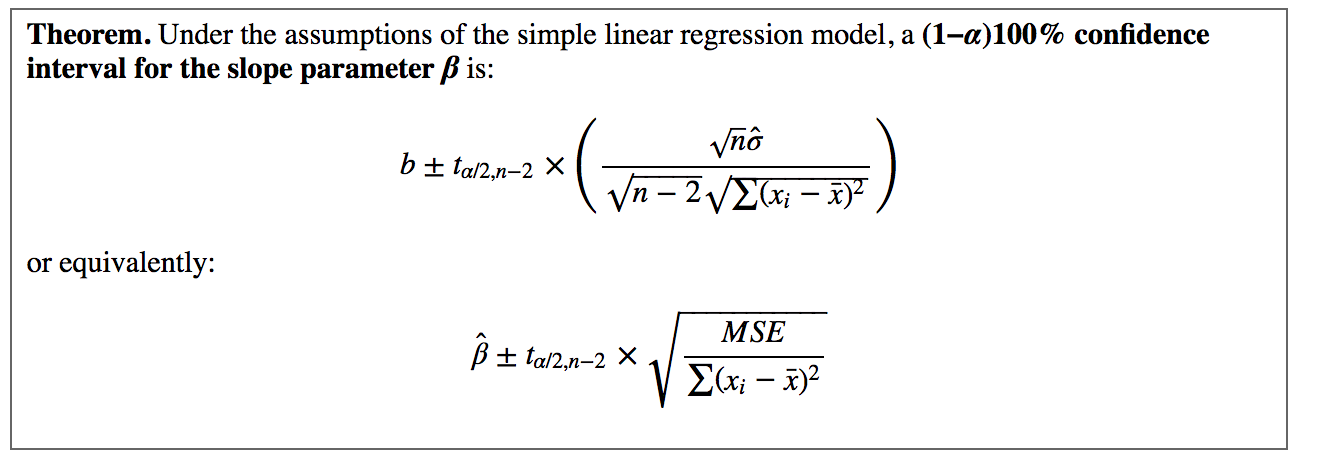

In [29]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression.png")

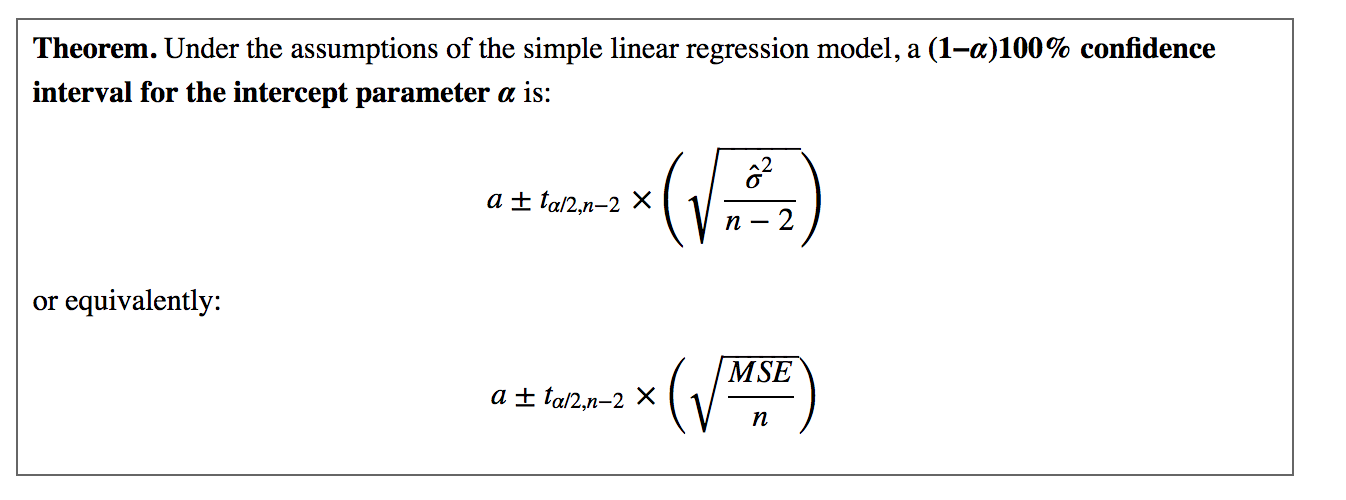

In [30]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression2.png")

[proof](https://onlinecourses.science.psu.edu/stat414/node/280)

2) **A confidence interval for E(y | x) , the expected (average) value of y for a given x_**

define s: residual standard error sy = sqrt(Sum((y_observed-y_predicted)^2)/(n-2))

(note: n-2 is the degrees of freedom of the problem: observations - number of parameters - 1)

the confidence interval for a given y(x*) is: 

y_predicted(x*) +/- t_(alpha/2)(n-2) * sy * sqrt( 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

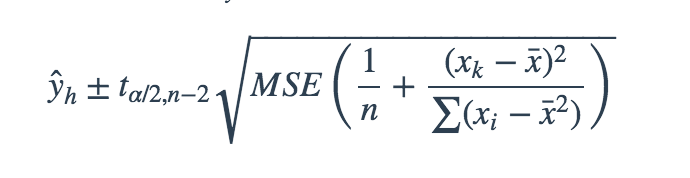

In [33]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciY.png")

3) **Confidence intervals for average y (predicted) values**

y_predicted(x*) +/- t_(n-2) * sy * sqrt( 1 + 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

very similar, but note the +1 in the square root

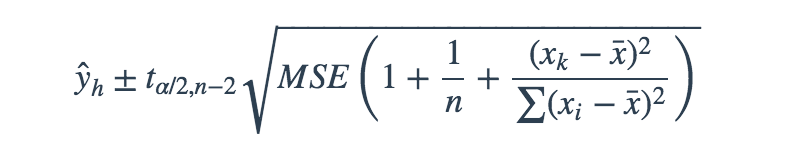

In [32]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciYaverage.png")

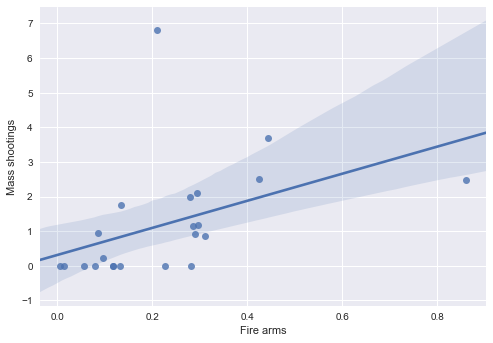

In [66]:
pl.figure()
import seaborn  as sns
sns.regplot(x="x", y="y", data=df_);

pl.ylabel("Mass shootings")
pl.xlabel("Fire arms");

## Use the stsatsmodels.gaphics package to plot the influence plot. 
Read the package documentation to learn how to read this plot and extract the countries with the highest influence

This is the topic of this week's assigned reading, so make sure you do the reading before you do this step. It will help you interpret the plot.

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


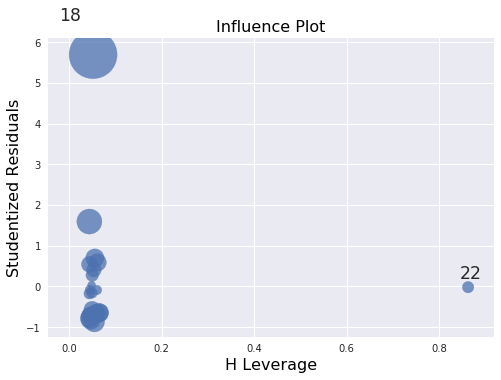

In [147]:
sm.graphics.influence_plot(olsfit, alpha  = 0.05, criterion="cooks");

### Figure: The US (#22) and New zealand (#18) stick out as they did in the previous graphs. THe US has high leverage but low residual. The other is the opposite. According to documentation this is a worrisome observation

In [ ]:
## refit without outliers? 

In [152]:
X = sm.add_constant(outlierwdf['FIREperPerson'])

In [153]:
Y = outlierwdf['MSperPerson']

In [154]:
olsfit = sm.OLS(Y, X).fit()


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


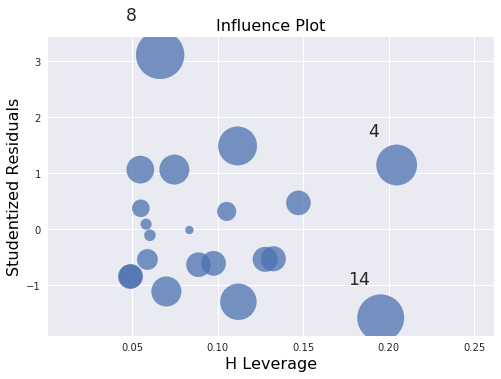

In [155]:
sm.graphics.influence_plot(olsfit, alpha  = 0.05, criterion="cooks");

#### Influence plots show the (externally) studentized residuals vs. the leverage of each observation as measured by the hat matrix.
https://www.statsmodels.org/dev/examples/notebooks/generated/regression_plots.html

Figure: The residuals are important to show how well a line is fit. Ideally you would want the ratio of residuals and leverage to be positively correllated, which we mostly see here, as opposed to previous graph.  

## Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences

## Discuss your findings